In [1]:
import mplhep as hep
import uproot
from matplotlib import pyplot as plt

from egamma_tnp.plot import plot_ratio

In [2]:
hep.style.use("CMS")
hep.style.use(
    {
        "figure.figsize": (6.4, 4.8),
        "font.size": 14,
        "legend.title_fontsize": 14,
        "savefig.bbox": "tight",
    }
)


def get_histograms(path):
    with uproot.open(path) as file:
        hpt_barrel_pass = file["pt/barrel/passing"].to_hist()
        hpt_barrel_all = file["pt/barrel/all"].to_hist()
        hpt_endcap_loweta_pass = file["pt/endcap_loweta/passing"].to_hist()
        hpt_endcap_loweta_all = file["pt/endcap_loweta/all"].to_hist()
        hpt_endcap_higheta_pass = file["pt/endcap_higheta/passing"].to_hist()
        hpt_endcap_higheta_all = file["pt/endcap_higheta/all"].to_hist()
        hpt_combined_pass = hpt_barrel_pass + hpt_endcap_loweta_pass + hpt_endcap_higheta_pass
        hpt_combined_all = hpt_barrel_all + hpt_endcap_loweta_all + hpt_endcap_higheta_all

        heta_entire_pass = file["eta/entire/passing"].to_hist()
        heta_entire_all = file["eta/entire/all"].to_hist()

        hphi_entire_pass = file["phi/entire/passing"].to_hist()
        hphi_entire_all = file["phi/entire/all"].to_hist()

    return (
        hpt_barrel_pass,
        hpt_barrel_all,
        hpt_endcap_loweta_pass,
        hpt_endcap_loweta_all,
        hpt_endcap_higheta_pass,
        hpt_endcap_higheta_all,
        hpt_combined_pass,
        hpt_combined_all,
        heta_entire_pass,
        heta_entire_all,
        hphi_entire_pass,
        hphi_entire_all,
    )


def pt_low_threshold_plot_setup(**legend_kwargs):
    plt.xlim(10, 400)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $P_T$ [GeV]")
    plt.ylabel(r"Efficiency")
    plt.xscale("log")
    plt.xticks([10, 100], [10, 100])
    plt.xticks(
        [20, 30, 40, 50, 60, 70, 80, 90, 200, 300, 400],
        [20, 30, 40, 50, None, None, None, None, 200, 300, 400],
        minor=True,
    )
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


def pt_high_threshold_plot_setup(**legend_kwargs):
    plt.xlim(10, 400)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $P_T$ [GeV]")
    plt.ylabel(r"Efficiency")
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


def eta_plot_setup(**legend_kwargs):
    plt.xlim(-2.5, 2.5)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $\eta$")
    plt.ylabel(r"Efficiency")
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


def phi_plot_setup(**legend_kwargs):
    plt.xlim(-3.32, 3.32)
    plt.ylim(0, 1.2)
    plt.xlabel(r"Offline electron $\phi$")
    plt.ylabel(r"Efficiency")
    plt.legend(**legend_kwargs) if legend_kwargs else plt.legend()


lumis = {
    "2022C": 5.0707,
    "2022D": 3.0063,
    "2022E": 5.8783,
    "2022F": 18.0070,
    "2022G": 3.1219,
    "2023B": 0.622,
    "2023C": 17.060,
    "2023D": 9.525,
}

In [3]:
tocompare = ["Ele30_2022.root", "Ele30_2023.root"]
run = ["Ele30 2022", "Ele30 2023"]

(
    hpt_barrel_pass1,
    hpt_barrel_all1,
    hpt_endcap_loweta_pass1,
    hpt_endcap_loweta_all1,
    hpt_endcap_higheta_pass1,
    hpt_endcap_higheta_all1,
    hpt_combined_pass1,
    hpt_combined_all1,
    heta_entire_pass1,
    heta_entire_all1,
    hphi_entire_pass1,
    hphi_entire_all1,
) = get_histograms(f"tnptuples/{tocompare[0]}")

(
    hpt_barrel_pass2,
    hpt_barrel_all2,
    hpt_endcap_loweta_pass2,
    hpt_endcap_loweta_all2,
    hpt_endcap_higheta_pass2,
    hpt_endcap_higheta_all2,
    hpt_combined_pass2,
    hpt_combined_all2,
    heta_entire_pass2,
    heta_entire_all2,
    hphi_entire_pass2,
    hphi_entire_all2,
) = get_histograms(f"tnptuples/{tocompare[1]}")

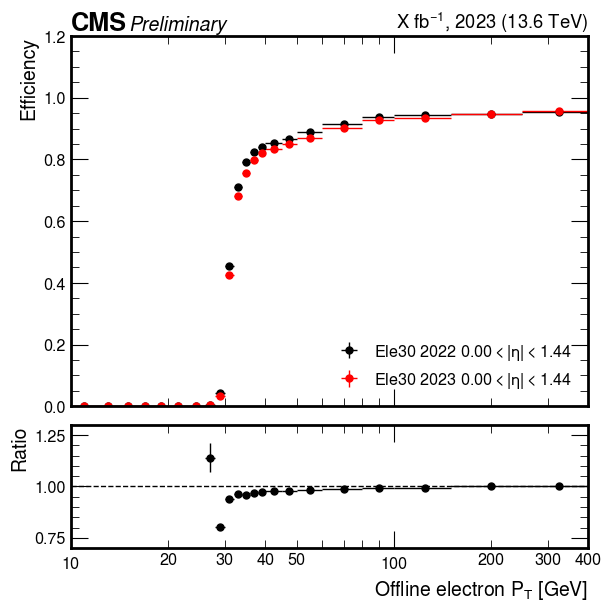

In [4]:
plot_ratio(
    hpt_barrel_pass1,
    hpt_barrel_all1,
    hpt_barrel_pass2,
    hpt_barrel_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 1.44$",
    label2=f"{run[1]} $0.00 < |\eta| < 1.44$",
    plottype="pt_low_threshold",
)

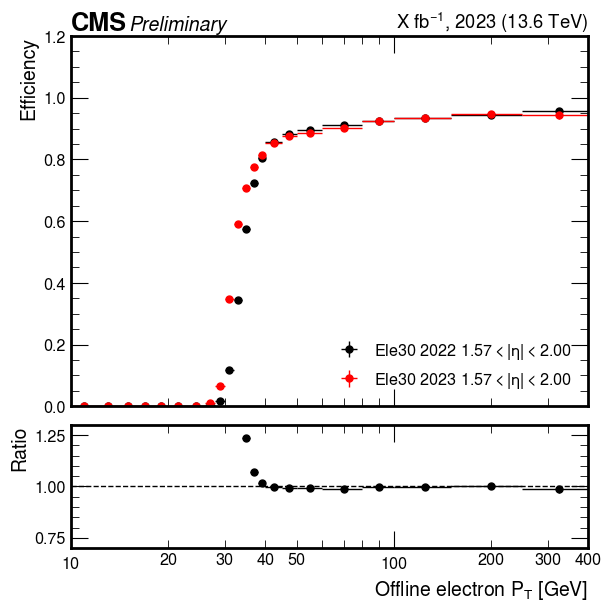

In [5]:
plot_ratio(
    hpt_endcap_loweta_pass1,
    hpt_endcap_loweta_all1,
    hpt_endcap_loweta_pass2,
    hpt_endcap_loweta_all2,
    label1=f"{run[0]} $1.57 < |\eta| < 2.00$",
    label2=f"{run[1]} $1.57 < |\eta| < 2.00$",
    plottype="pt_low_threshold",
)

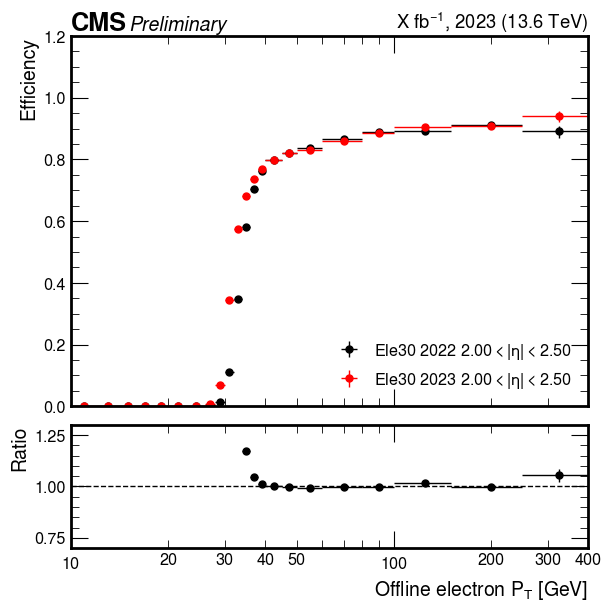

In [6]:
plot_ratio(
    hpt_endcap_higheta_pass1,
    hpt_endcap_higheta_all1,
    hpt_endcap_higheta_pass2,
    hpt_endcap_higheta_all2,
    label1=f"{run[0]} $2.00 < |\eta| < 2.50$",
    label2=f"{run[1]} $2.00 < |\eta| < 2.50$",
    plottype="pt_low_threshold",
)

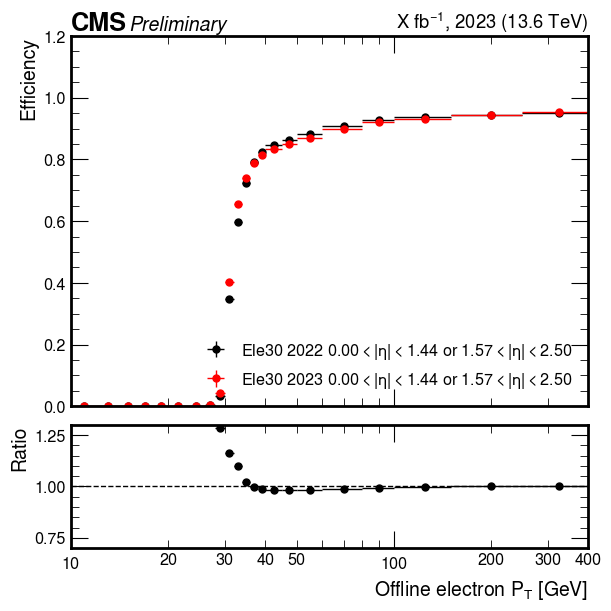

In [7]:
plot_ratio(
    hpt_combined_pass1,
    hpt_combined_all1,
    hpt_combined_pass2,
    hpt_combined_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 1.44$ or $1.57 < |\eta| < 2.50$",
    label2=f"{run[1]} $0.00 < |\eta| < 1.44$ or $1.57 < |\eta| < 2.50$",
    plottype="pt_low_threshold",
)

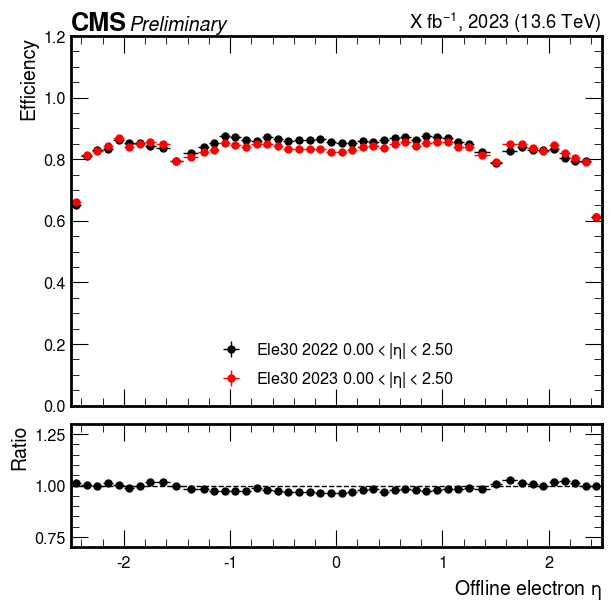

In [8]:
plot_ratio(
    heta_entire_pass1,
    heta_entire_all1,
    heta_entire_pass2,
    heta_entire_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 2.50$",
    label2=f"{run[1]} $0.00 < |\eta| < 2.50$",
    plottype="eta",
)

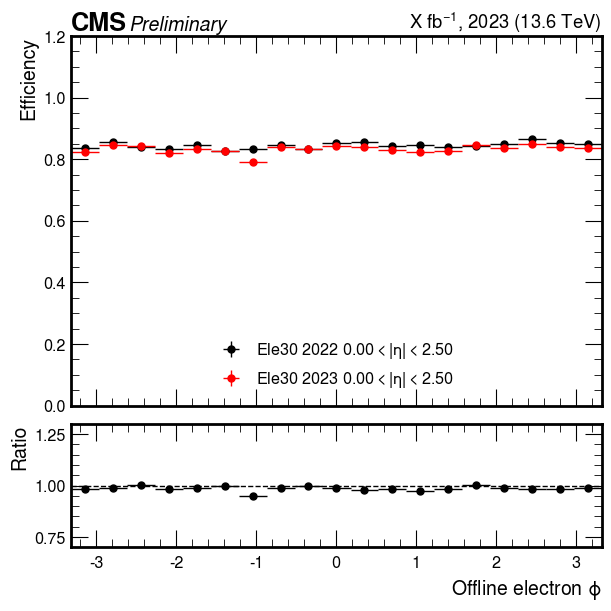

In [9]:
plot_ratio(
    hphi_entire_pass1,
    hphi_entire_all1,
    hphi_entire_pass2,
    hphi_entire_all2,
    label1=f"{run[0]} $0.00 < |\eta| < 2.50$",
    label2=f"{run[1]} $0.00 < |\eta| < 2.50$",
    plottype="phi",
)